Exploring

In [2]:
import anndata as ad
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [3]:

adata = sc.read_h5ad('/home/hkaufm49/working_repo/TMS/pansci/data/GSE247719_PanSci_Myeloid_cell_adata.h5ad')
adata


KeyboardInterrupt: 

In [3]:
# filtered already
adata = sc.read_h5ad('/home/hkaufm49/working_repo/TMS/pansci/data/pansci_3m_wt.h5ad')

In [4]:
print(adata.X)

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 55167340 stored elements and shape (126038, 55416)>
  Coords	Values
  (0, 318)	1.0
  (0, 389)	1.0
  (0, 503)	1.0
  (0, 564)	1.0
  (0, 653)	1.0
  (0, 830)	2.0
  (0, 873)	1.0
  (0, 899)	2.0
  (0, 936)	1.0
  (0, 980)	2.0
  (0, 1033)	3.0
  (0, 1048)	2.0
  (0, 1063)	1.0
  (0, 1161)	1.0
  (0, 1203)	1.0
  (0, 1216)	1.0
  (0, 1253)	1.0
  (0, 1255)	2.0
  (0, 1389)	7.0
  (0, 1507)	1.0
  (0, 1516)	1.0
  (0, 1552)	1.0
  (0, 1574)	2.0
  (0, 1602)	1.0
  (0, 1688)	1.0
  :	:
  (126037, 49900)	1.0
  (126037, 49915)	10.0
  (126037, 50122)	1.0
  (126037, 50138)	1.0
  (126037, 50189)	1.0
  (126037, 50348)	1.0
  (126037, 50384)	1.0
  (126037, 50707)	1.0
  (126037, 50998)	1.0
  (126037, 51023)	4.0
  (126037, 51024)	2.0
  (126037, 51036)	1.0
  (126037, 51104)	1.0
  (126037, 51760)	1.0
  (126037, 51843)	1.0
  (126037, 52602)	1.0
  (126037, 52651)	1.0
  (126037, 52802)	2.0
  (126037, 53065)	1.0
  (126037, 53312)	1.0
  (126037, 53479)	1.0
  (126037, 

In [5]:
# get info
adata.obs.columns.tolist()

['Genotype',
 'Age_group',
 'ID',
 'Organ_name',
 'UMI_count',
 'Gene_count',
 'Immune_main_type',
 'Immune_subtype',
 'Immune_umap_1',
 'Immune_umap_2',
 'Doublet_scores',
 'Sub_cell_type',
 'Main_cell_type',
 'Lineage',
 'Sex',
 'sample']

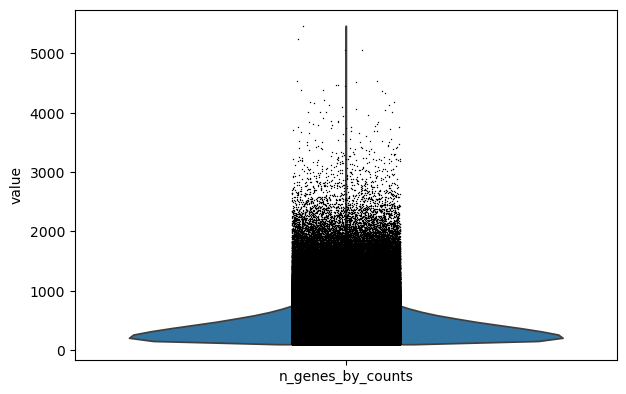

In [6]:
# check sparsity
sc.pp.calculate_qc_metrics(adata, inplace=True)
sc.pl.violin(adata, keys='n_genes_by_counts', jitter=0.1)

In [6]:
# unique immune subtypes in the set
adata.obs['Immune_subtype'].unique()

['Mmp12+ Mmp19+ macrophages', 'Type-1 conventional dendritic cells', 'Type-2 conventional dendritic cells', 'Retnla+ Cd226+ macrophages', 'Intestinal macrophages', ..., 'Colq+ Gpm6b+ macrophages', 'Fcgr4+ Itgad+ macrophages', 'Muscle-resident macrophages', 'Megakaryocytes', 'Erythroblasts']
Length: 23
Categories (23, object): ['Basophils', 'Cfd+ Scd1+ macrophages', 'Chil3+ alveolar macrophages', 'Col14a1+ Itga8+ macrophages', ..., 'Proliferating macrophages', 'Retnla+ Cd226+ macrophages', 'Type-1 conventional dendritic cells', 'Type-2 conventional dendritic cells']

In [7]:
# unique immune subtypes in the set
adata.obs['Sub_cell_type'].unique()


['Myeloid cells-7-Liver', 'Myeloid cells-9-Liver', 'Myeloid cells_Dendritic cells-2-Duodenum', 'Myeloid cells-8-BAT', 'Myeloid cells-4-BAT', ..., 'Lymphoid cells_B cells-9-Duodenum', 'Lymphoid cells_Plasma cells-8-Duodenum', 'Lymphoid cells_T cells-15-Duodenum', 'Lymphoid cells_T cells-0-Duodenum', 'Lymphoid cells_T cells-13-Duodenum']
Length: 1054
Categories (1054, object): ['Alox15 positive cells-0-Heart', 'Erythroblasts-0-Muscle', 'Erythroblasts-0-gWAT', 'Erythroblasts-1-Muscle', ..., 'Myeloid cells_Neutrophils-13-Lung', 'Myeloid cells_Neutrophils-14-Lung', 'Myeloid cells_Neutrophils-15-Lung', 'Myeloid cells_Neutrophils-16-Lung']

AttributeError: module 'matplotlib' has no attribute 'ylabel'

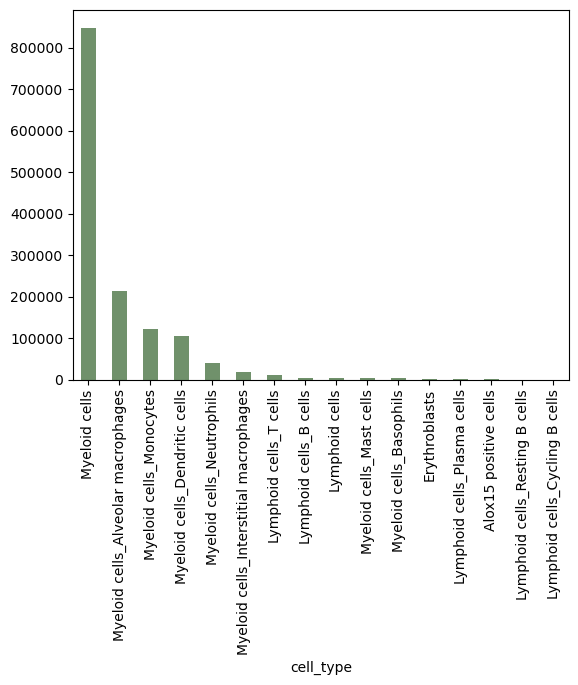

In [14]:
# visualize number of cells per cell type
group_counts = adata.obs.groupby('cell_type').size().sort_values(ascending=False)


plt.figure(figsize=(10, 6))
ax = group_counts.plot(kind='bar', color='#70916B') 
ax.set_facecolor("white")  # Remove grey background
ax.grid(False) 
plt.xticks(rotation=45, ha='right')
ax.set_xlabel('')
plt.tight_layout()
plt.show()

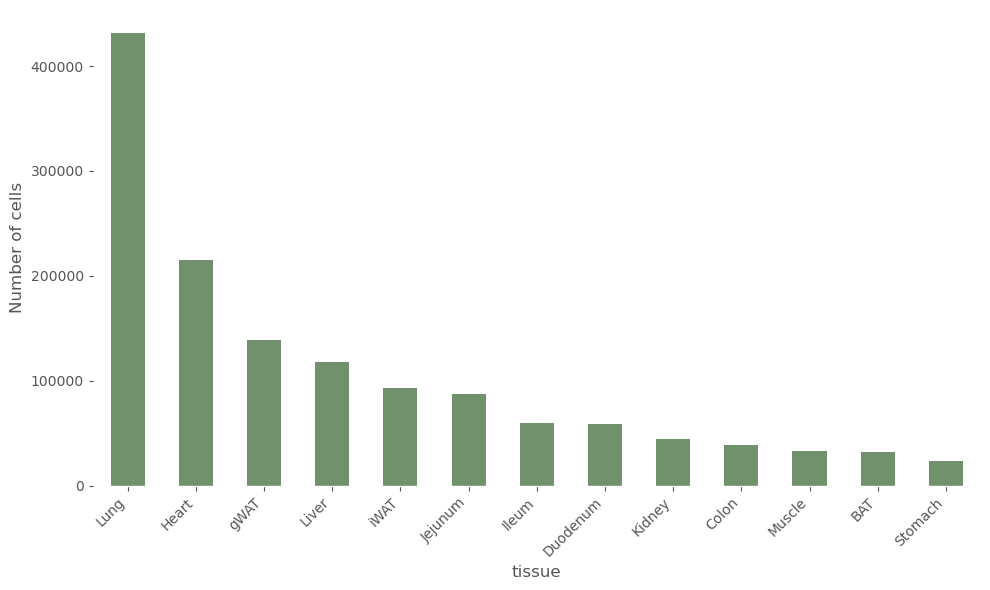

In [92]:
# visualize number of cells per tissue
group_counts = adata.obs.groupby('tissue').size().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = group_counts.plot(kind='bar', color='#70916B') 
ax.set_facecolor("white")  # Remove grey background
ax.grid(False) 
plt.ylabel('Number of cells')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Age 3 only

In [9]:
adata.obs


,Genotype,Age_group,ID,Organ_name,UMI_count,Gene_count,Immune_main_type,Immune_subtype,Immune_umap_1,Immune_umap_2,...,Sex,sample,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes
sample,,,,,,,,,,,,,,,,,,,,,
20230714_EXP121_001_AACTTAATAC_Plate_1_AGAGAAGGTT_GCTCAGCCGG,WT,23_months,1,Liver,1994,846,Myeloid cells,Mmp12+ Mmp19+ macrophages,2.218967,6.047983,...,Male,20230714_EXP121_001_AACTTAATAC_Plate_1_AGAGAAG...,846,6.741701,1994.0,7.598399,48.746239,55.366098,65.396189,82.647944
20230714_EXP121_001_AACTTAATAC_Plate_1_CATTCGACGG_TTCAATATAA,WT,23_months,54,Liver,742,378,Myeloid cells,Type-1 conventional dendritic cells,8.369672,12.312893,...,Female,20230714_EXP121_001_AACTTAATAC_Plate_1_CATTCGA...,378,5.937536,742.0,6.610696,51.078167,62.533693,76.010782,100.000000
20230714_EXP121_001_AACTTAATAC_Plate_2_ACTCTACTGG_TCGAGGAGTA,WT,06_months,112,Duodenum,763,457,Myeloid cells,Type-2 conventional dendritic cells,6.078516,10.605874,...,Male,20230714_EXP121_001_AACTTAATAC_Plate_2_ACTCTAC...,457,6.126869,763.0,6.638568,36.828309,49.934469,66.317169,100.000000
20230714_EXP121_001_AAGGAAGACG_Plate_2_GACCAATGCG_AGGTAATAGG,WT,23_months,107,Duodenum,955,588,Myeloid cells,Type-2 conventional dendritic cells,6.283165,10.680276,...,Male,20230714_EXP121_001_AAGGAAGACG_Plate_2_GACCAAT...,588,6.378426,955.0,6.862758,32.356021,43.769634,59.371728,90.785340
20230714_EXP121_001_AAGTCAACGG_Plate_1_ACGCGAGATT_GAGCATATGG,WT,23_months,83,BAT,1500,787,Myeloid cells,Type-2 conventional dendritic cells,4.816445,8.053991,...,Female,20230714_EXP121_001_AAGTCAACGG_Plate_1_ACGCGAG...,787,6.669498,1500.0,7.313887,34.333333,44.200000,57.533333,80.866667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230626_EXP119_384_TTGATTATAA_Plate_4_ATTCAGTTGG_CTTACTCAGG,Prkdc,03_months,47,Duodenum,247,164,Myeloid cells,Intestinal macrophages,16.220264,-1.209003,...,Male,20230626_EXP119_384_TTGATTATAA_Plate_4_ATTCAGT...,164,5.105945,247.0,5.513429,53.846154,74.089069,100.000000,100.000000
20230626_EXP119_384_TTGCGGCGGT_Plate_4_TGCAGATCCA_ATGGTCAAGG,WT,03_months,44,Duodenum,293,208,Myeloid cells,Intestinal macrophages,16.510351,-2.274788,...,Female,20230626_EXP119_384_TTGCGGCGGT_Plate_4_TGCAGAT...,208,5.342334,293.0,5.683580,46.075085,63.139932,97.269625,100.000000
20230626_EXP119_384_TTGCTGAAGT_Plate_4_CCAATAGAAC_GATCGTCCGT,WT,23_months,51,Duodenum,366,240,Myeloid cells,Intestinal macrophages,15.810182,-2.129206,...,Female,20230626_EXP119_384_TTGCTGAAGT_Plate_4_CCAATAG...,240,5.484797,366.0,5.905362,46.448087,61.748634,89.071038,100.000000


In [6]:
pansci_3m = adata[ adata.obs['Age_group']== "03_months"]


In [10]:
pansci_3m.obs['Genotype'].value_counts()

Genotype
WT    126038
Name: count, dtype: int64

In [11]:
# unique immune subtypes in the set
pansci_3m.obs['Sub_cell_type'].unique()



['Myeloid cells-8-Colon', 'Myeloid cells-1-Colon', 'Myeloid cells-9-Colon', 'Myeloid cells-0-Colon', 'Myeloid cells-20-Colon', ..., 'Lymphoid cells_T cells-12-Duodenum', 'Lymphoid cells_B cells-7-Duodenum', 'Lymphoid cells_T cells-14-Duodenum', 'Lymphoid cells_B cells-5-Duodenum', 'Lymphoid cells_Plasma cells-2-Duodenum']
Length: 778
Categories (778, object): ['Alox15 positive cells-0-Heart', 'Erythroblasts-0-Muscle', 'Erythroblasts-0-gWAT', 'Erythroblasts-1-Muscle', ..., 'Myeloid cells_Neutrophils-13-Lung', 'Myeloid cells_Neutrophils-14-Lung', 'Myeloid cells_Neutrophils-15-Lung', 'Myeloid cells_Neutrophils-16-Lung']

In [12]:
pansci_3m.obs["Sex"].value_counts()

Sex
Male      70447
Female    55591
Name: count, dtype: int64

In [14]:
pansci_3m.obs['Immune_subtype'].value_counts()

Immune_subtype
Lyve1+ Colec12+ macrophages            66503
Chil3+ alveolar macrophages            61719
Kupffer cells                          33207
Intestinal macrophages                 32311
Inflammatory monocytes                 25019
Neutrophils                            23335
Patrolling monocytes                   21717
Type-2 conventional dendritic cells    13416
Type-1 conventional dendritic cells    12894
Cfd+ Scd1+ macrophages                 10125
Migratory dendritic cells               9074
Retnla+ Cd226+ macrophages              8811
Muscle-resident macrophages             7362
Col14a1+ Itga8+ macrophages             7206
Proliferating macrophages               5782
Gpc6+ Hspg2+ macrophages                4950
Mmp12+ Mmp19+ macrophages               2895
Mast cells                              2577
Colq+ Gpm6b+ macrophages                2364
Erythroblasts                           1624
Basophils                               1316
Megakaryocytes                          

In [14]:
pansci_3m.obs

,Genotype,Age_group,ID,Organ_name,UMI_count,Gene_count,Immune_main_type,Immune_subtype,Immune_umap_1,Immune_umap_2,Doublet_scores,Sub_cell_type,Main_cell_type,Lineage,Sex,sample
sample,,,,,,,,,,,,,,,,
20230714_EXP121_001_AGAGCTTACC_Plate_2_CGCCAGGCAT_CGAATAGATG,WT,03_months,63,Colon,1022,576,Myeloid cells,Gpc6+ Hspg2+ macrophages,9.132228,6.361629,0.171171,Myeloid cells-8-Colon,Myeloid cells,Immune,Male,20230714_EXP121_001_AGAGCTTACC_Plate_2_CGCCAGG...
20230714_EXP121_001_AGAGGACTGG_Plate_2_GAGGCTTATT_TCAGCTCTAA,WT,03_months,63,Colon,996,578,Myeloid cells,Intestinal macrophages,15.692972,-2.955615,0.004692,Myeloid cells-1-Colon,Myeloid cells,Immune,Male,20230714_EXP121_001_AGAGGACTGG_Plate_2_GAGGCTT...
20230714_EXP121_001_ATCCAAGTTG_Plate_2_GAGGCTTATT_TCAGCTCTAA,WT,03_months,63,Colon,809,348,Myeloid cells,Intestinal macrophages,13.962811,0.007488,0.003568,Myeloid cells-9-Colon,Myeloid cells,Immune,Male,20230714_EXP121_001_ATCCAAGTTG_Plate_2_GAGGCTT...
20230714_EXP121_001_ATCGGCGGCA_Plate_2_TTCTCTGAGA_CAGATTCGAT,WT,03_months,63,Colon,1272,723,Myeloid cells,Intestinal macrophages,15.936307,-2.918030,0.004692,Myeloid cells-1-Colon,Myeloid cells,Immune,Male,20230714_EXP121_001_ATCGGCGGCA_Plate_2_TTCTCTG...
20230714_EXP121_001_CAGTTGCTTG_Plate_2_ATAACCGTTC_GTTATGGATC,WT,03_months,63,Colon,1008,399,Myeloid cells,Intestinal macrophages,13.969186,0.040720,0.000478,Myeloid cells-0-Colon,Myeloid cells,Immune,Male,20230714_EXP121_001_CAGTTGCTTG_Plate_2_ATAACCG...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230626_EXP119_384_TAAGACCATT_Plate_4_ACCAGACGCT_CTTATGAACC,WT,03_months,44,Duodenum,3236,383,Myeloid cells,Intestinal macrophages,15.509038,-0.127199,0.121528,Myeloid cells-1-Duodenum,Myeloid cells,Immune,Female,20230626_EXP119_384_TAAGACCATT_Plate_4_ACCAGAC...
20230626_EXP119_384_TACCTATCCG_Plate_4_ACTCGCGCAT_GTTCGTTATC,WT,03_months,45,Duodenum,1004,244,Myeloid cells,Intestinal macrophages,15.351234,-0.500622,0.032362,Myeloid cells-1-Duodenum,Myeloid cells,Immune,Female,20230626_EXP119_384_TACCTATCCG_Plate_4_ACTCGCG...
20230626_EXP119_384_TGCTATGATG_Plate_4_CCGAACCTTC_AACCTATGCC,WT,03_months,45,Duodenum,1935,685,Myeloid cells,Intestinal macrophages,15.493017,-1.193337,0.045283,Myeloid cells-1-Duodenum,Myeloid cells,Immune,Female,20230626_EXP119_384_TGCTATGATG_Plate_4_CCGAACC...


In [19]:

# just macrophages here 
narrowed_cell_type_list = ['Chil3+ alveolar macrophages', 
                           'Inflammatory monocytes',
                            'Patrolling monocytes',
                            'Col14a1+ Itga8+ macrophages',
                            'Proliferating macrophages',
                            'Lyve1+ Colec12+ macrophages',
                            'Retnla+ Cd226+ macrophages',
                            'Cfd+ Scd1+ macrophages',
                            'Intestinal macrophages',
                            'Gpc6+ Hspg2+ macrophages',
                            'Kupffer cells',
                            'Mmp12+ Mmp19+ macrophages',
                            'Muscle-resident macrophages',
                            'Colq+ Gpm6b+ macrophages',
                            'Fcgr4+ Itgad+ macrophages']
pansci_3m = adata[adata.obs['Immune_subtype'].isin(narrowed_cell_type_list)].copy()

In [20]:
pansci_3m.obs

,Genotype,Age_group,ID,Organ_name,UMI_count,Gene_count,Immune_main_type,Immune_subtype,Immune_umap_1,Immune_umap_2,Doublet_scores,Sub_cell_type,Main_cell_type,Lineage,Sex,sample
sample,,,,,,,,,,,,,,,,
20230714_EXP121_001_AGAGCTTACC_Plate_2_CGCCAGGCAT_CGAATAGATG,WT,03_months,63,Colon,1022,576,Myeloid cells,Gpc6+ Hspg2+ macrophages,9.132228,6.361629,0.171171,Myeloid cells-8-Colon,Myeloid cells,Immune,Male,20230714_EXP121_001_AGAGCTTACC_Plate_2_CGCCAGG...
20230714_EXP121_001_AGAGGACTGG_Plate_2_GAGGCTTATT_TCAGCTCTAA,WT,03_months,63,Colon,996,578,Myeloid cells,Intestinal macrophages,15.692972,-2.955615,0.004692,Myeloid cells-1-Colon,Myeloid cells,Immune,Male,20230714_EXP121_001_AGAGGACTGG_Plate_2_GAGGCTT...
20230714_EXP121_001_ATCCAAGTTG_Plate_2_GAGGCTTATT_TCAGCTCTAA,WT,03_months,63,Colon,809,348,Myeloid cells,Intestinal macrophages,13.962811,0.007488,0.003568,Myeloid cells-9-Colon,Myeloid cells,Immune,Male,20230714_EXP121_001_ATCCAAGTTG_Plate_2_GAGGCTT...
20230714_EXP121_001_ATCGGCGGCA_Plate_2_TTCTCTGAGA_CAGATTCGAT,WT,03_months,63,Colon,1272,723,Myeloid cells,Intestinal macrophages,15.936307,-2.918030,0.004692,Myeloid cells-1-Colon,Myeloid cells,Immune,Male,20230714_EXP121_001_ATCGGCGGCA_Plate_2_TTCTCTG...
20230714_EXP121_001_CAGTTGCTTG_Plate_2_ATAACCGTTC_GTTATGGATC,WT,03_months,63,Colon,1008,399,Myeloid cells,Intestinal macrophages,13.969186,0.040720,0.000478,Myeloid cells-0-Colon,Myeloid cells,Immune,Male,20230714_EXP121_001_CAGTTGCTTG_Plate_2_ATAACCG...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230626_EXP119_384_TAAGACCATT_Plate_4_ACCAGACGCT_CTTATGAACC,WT,03_months,44,Duodenum,3236,383,Myeloid cells,Intestinal macrophages,15.509038,-0.127199,0.121528,Myeloid cells-1-Duodenum,Myeloid cells,Immune,Female,20230626_EXP119_384_TAAGACCATT_Plate_4_ACCAGAC...
20230626_EXP119_384_TACCTATCCG_Plate_4_ACTCGCGCAT_GTTCGTTATC,WT,03_months,45,Duodenum,1004,244,Myeloid cells,Intestinal macrophages,15.351234,-0.500622,0.032362,Myeloid cells-1-Duodenum,Myeloid cells,Immune,Female,20230626_EXP119_384_TACCTATCCG_Plate_4_ACTCGCG...
20230626_EXP119_384_TGCTATGATG_Plate_4_CCGAACCTTC_AACCTATGCC,WT,03_months,45,Duodenum,1935,685,Myeloid cells,Intestinal macrophages,15.493017,-1.193337,0.045283,Myeloid cells-1-Duodenum,Myeloid cells,Immune,Female,20230626_EXP119_384_TGCTATGATG_Plate_4_CCGAACC...


In [15]:
pansci_3m = adata

In [22]:
# number of genes per cell

pansci_3m.obs['Gene_count'].mean()


np.float64(440.9201611480327)

<Axes: xlabel='Gene_count', ylabel='Count'>

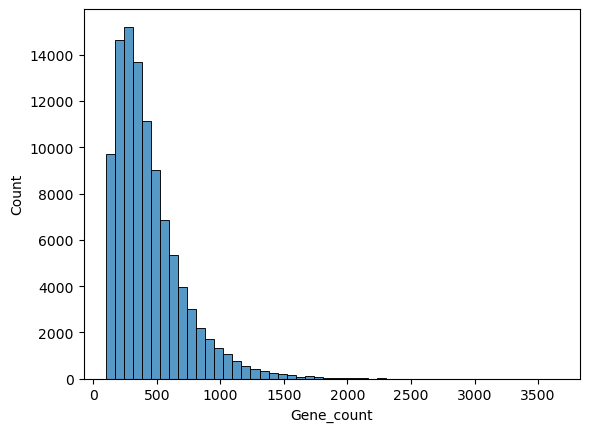

In [21]:
sns.histplot(pansci_3m.obs['Gene_count'], bins=50)

Text(0.5, 0.98, 'Gene count distribution per cell type')

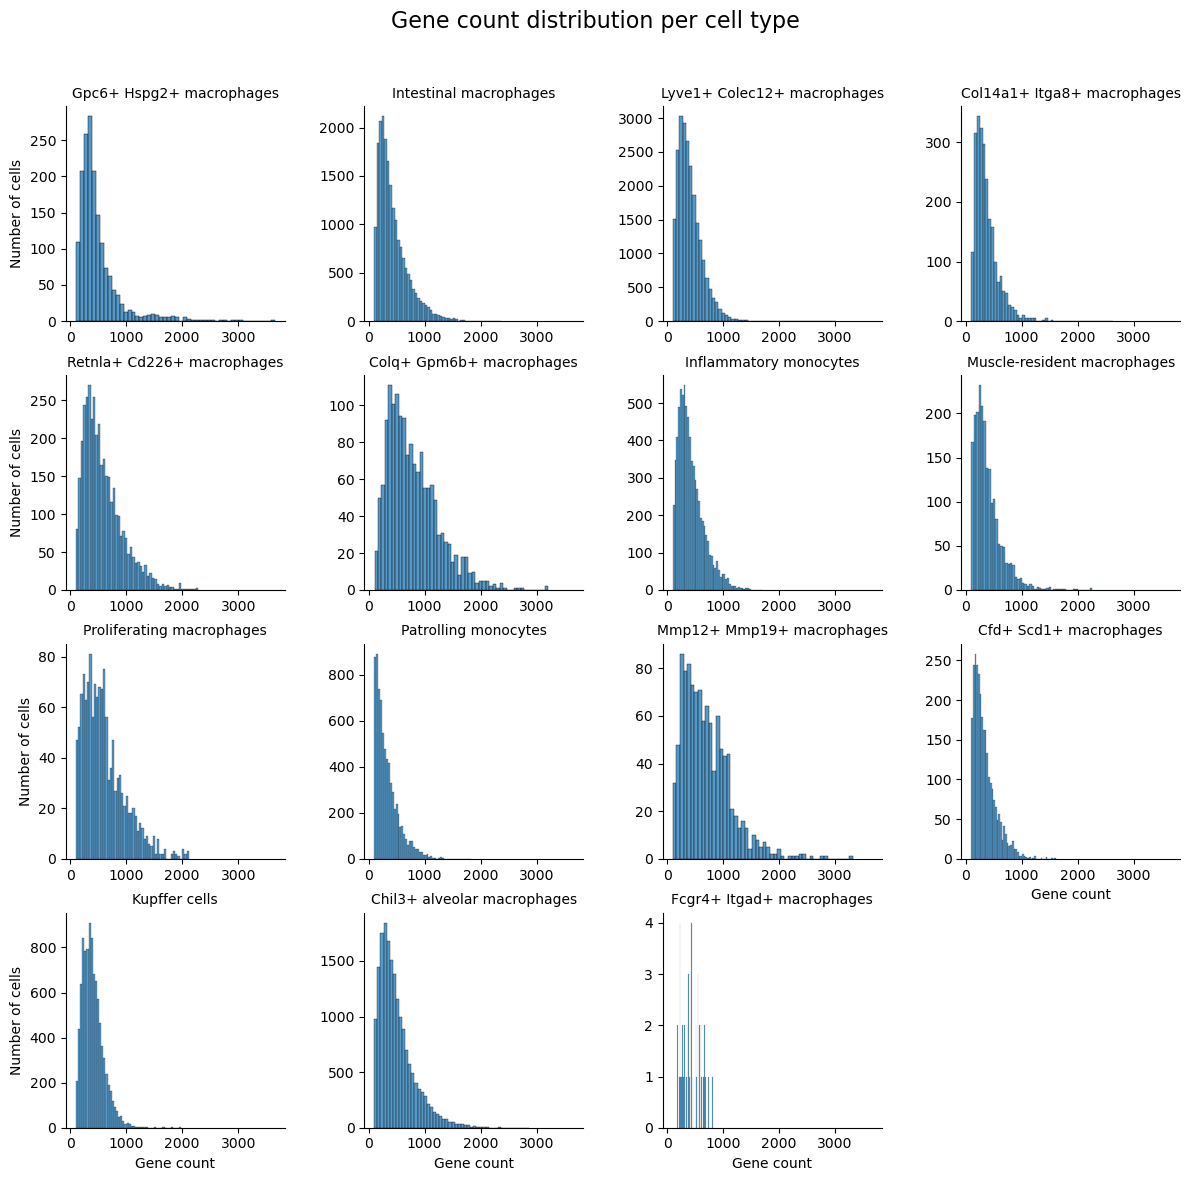

In [23]:

# Make sure your cell type column exists and is categorical
pansci_3m.obs['Immune_subtype'] = pansci_3m.obs['Immune_subtype'].astype(str)

# Create FacetGrid
g = sns.FacetGrid(pansci_3m.obs, col="Immune_subtype", col_wrap=4, sharex=True, sharey=False)
g.map(sns.histplot, "Gene_count", bins=50)
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)

g.set_titles(col_template="{col_name}")
g.set_axis_labels("Gene count", "Number of cells")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Gene count distribution per cell type", fontsize=16)


In [24]:
adata_middle_size = pansci_3m[pansci_3m.obs['Gene_count'] > 500]
adata_middle_size

View of AnnData object with n_obs × n_vars = 31652 × 55416
    obs: 'Genotype', 'Age_group', 'ID', 'Organ_name', 'UMI_count', 'Gene_count', 'Immune_main_type', 'Immune_subtype', 'Immune_umap_1', 'Immune_umap_2', 'Doublet_scores', 'Sub_cell_type', 'Main_cell_type', 'Lineage', 'Sex', 'sample'
    var: 'gene_id', 'gene_type', 'gene_name'
    layers: 'raw_counts'

/tmp/ipykernel_2252565/3503437164.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_middle_size.obs['Immune_subtype'] = adata_middle_size.obs['Immune_subtype'].astype(str)


Text(0.5, 0.98, 'Gene count distribution per cell type')

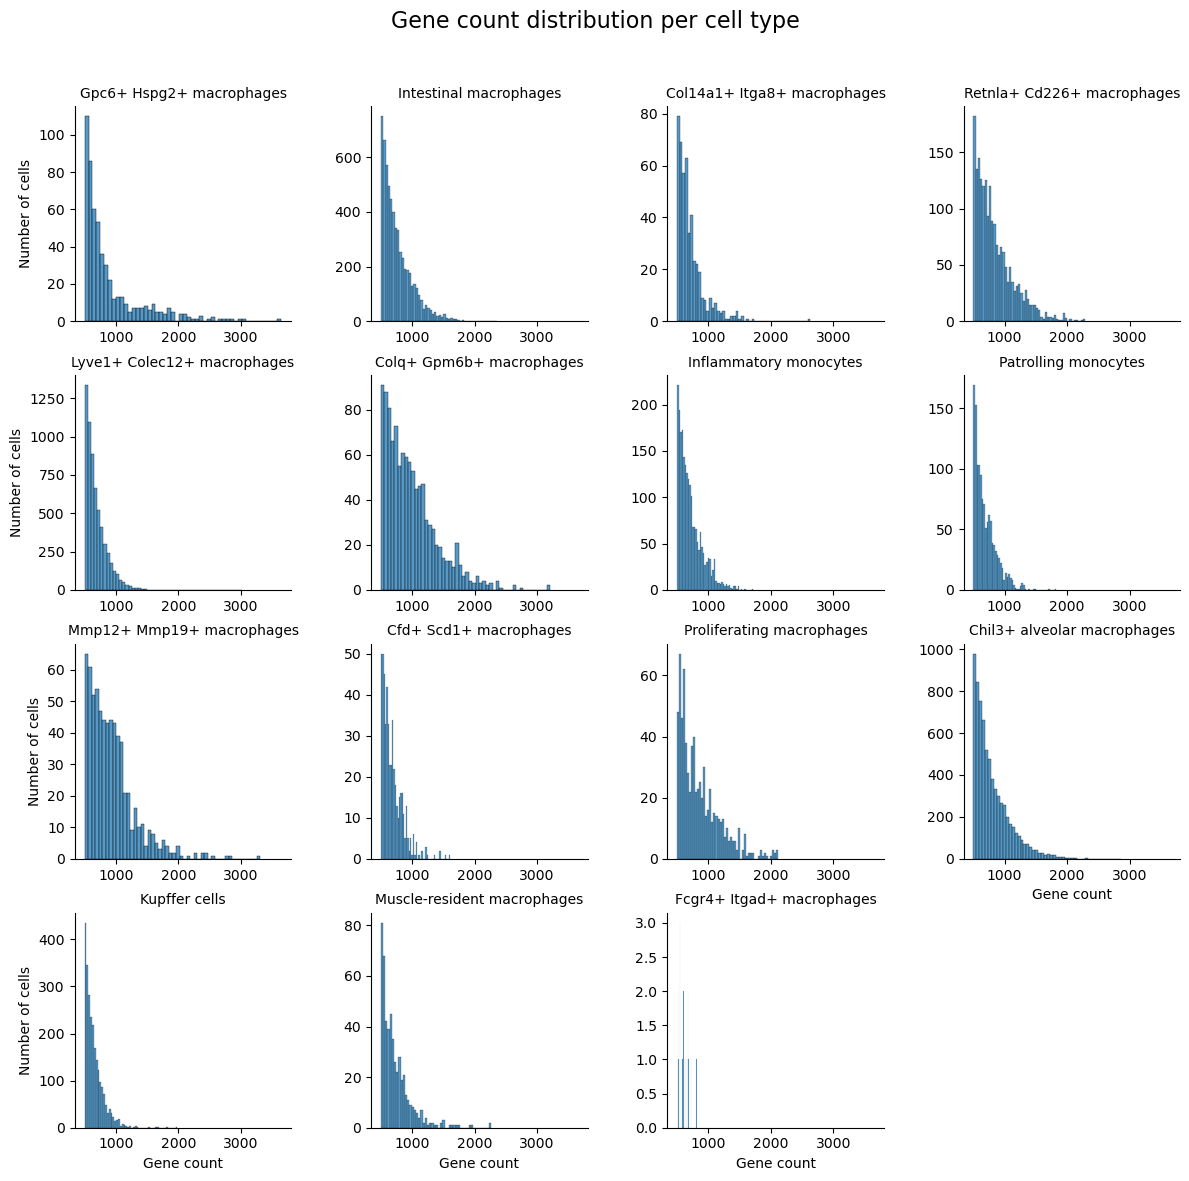

In [28]:

# Make sure your cell type column exists and is categorical
adata_middle_size.obs['Immune_subtype'] = adata_middle_size.obs['Immune_subtype'].astype(str)

# Create FacetGrid
g = sns.FacetGrid(adata_middle_size.obs, col="Immune_subtype", col_wrap=4, sharex=True, sharey=False)
g.map(sns.histplot, "Gene_count", bins=50)
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)

g.set_titles(col_template="{col_name}")
g.set_axis_labels("Gene count", "Number of cells")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Gene count distribution per cell type", fontsize=16)

In [25]:
adata_best_cells = pansci_3m[pansci_3m.obs['Gene_count'] > 900]
adata_best_cells

View of AnnData object with n_obs × n_vars = 6771 × 55416
    obs: 'Genotype', 'Age_group', 'ID', 'Organ_name', 'UMI_count', 'Gene_count', 'Immune_main_type', 'Immune_subtype', 'Immune_umap_1', 'Immune_umap_2', 'Doublet_scores', 'Sub_cell_type', 'Main_cell_type', 'Lineage', 'Sex', 'sample'
    var: 'gene_id', 'gene_type', 'gene_name'
    layers: 'raw_counts'

/tmp/ipykernel_2252565/3341442996.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_best_cells.obs['Immune_subtype'] = adata_best_cells.obs['Immune_subtype'].astype(str)


Text(0.5, 0.98, 'Gene count distribution per cell type')

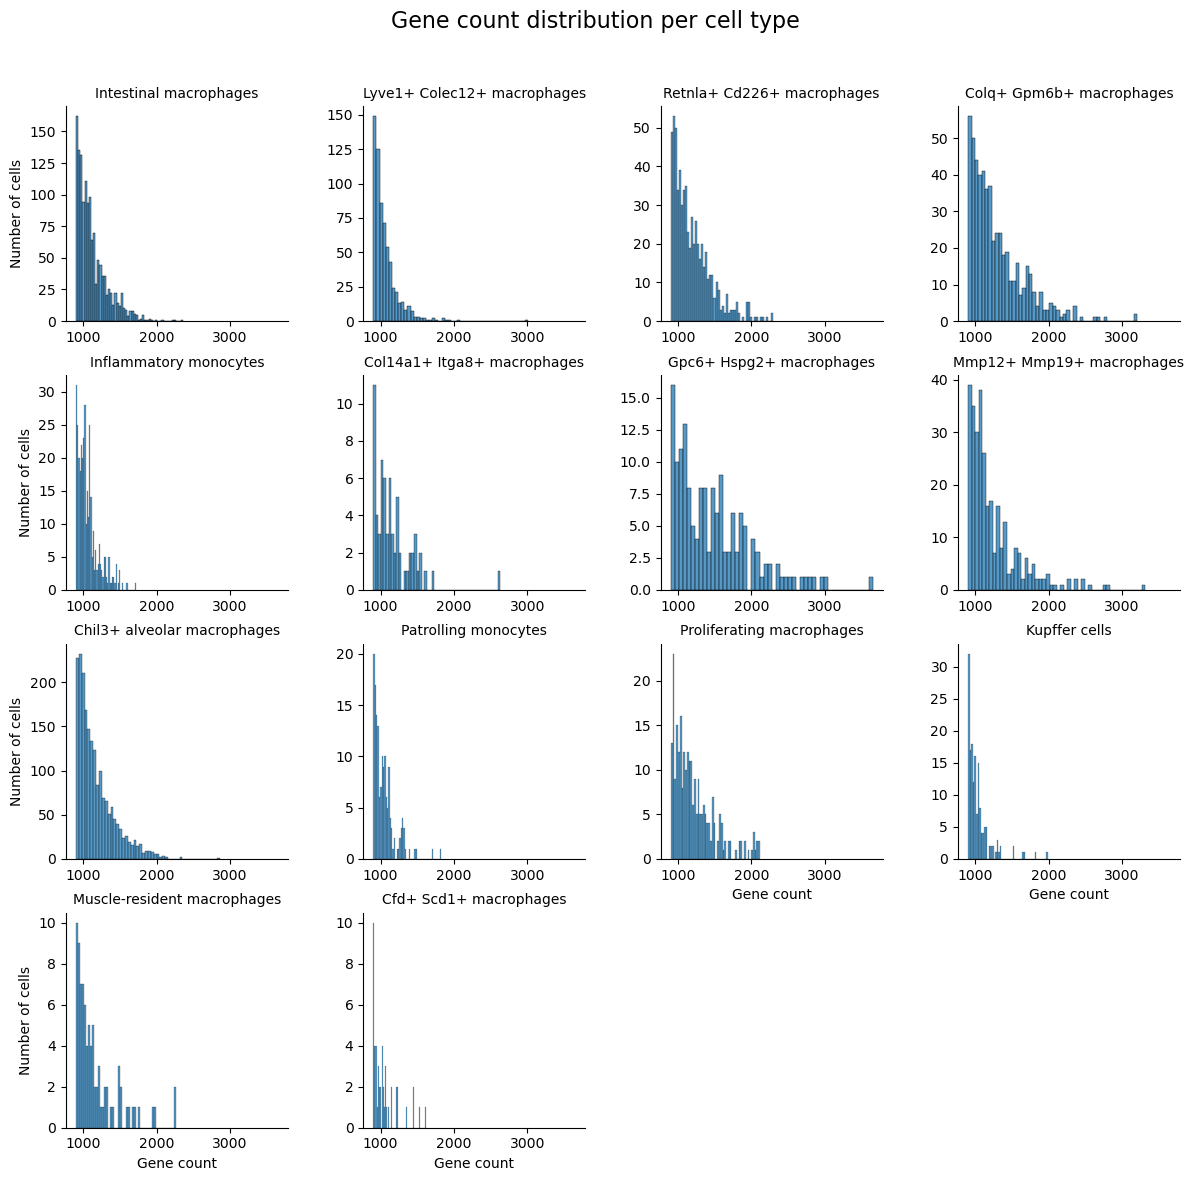

In [26]:

# Make sure your cell type column exists and is categorical
adata_best_cells.obs['Immune_subtype'] = adata_best_cells.obs['Immune_subtype'].astype(str)

# Create FacetGrid
g = sns.FacetGrid(adata_best_cells.obs, col="Immune_subtype", col_wrap=4, sharex=True, sharey=False)
g.map(sns.histplot, "Gene_count", bins=50)
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)

g.set_titles(col_template="{col_name}")
g.set_axis_labels("Gene count", "Number of cells")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Gene count distribution per cell type", fontsize=16)

In [22]:
cell_index = 0
nonzero_expr = pansci_3m.X[cell_index].toarray().flatten()  # if sparse
nonzero_expr = nonzero_expr[nonzero_expr > 0]

In [23]:
# mean expression for detected genes per cell
mean_expr_detected = (adata.X.multiply(adata.X > 0)).sum(axis=1) / (adata.X > 0).sum(axis=1)

In [24]:
adata.obs['mean_expr_detected'] = np.array(mean_expr_detected).flatten()

<Axes: xlabel='mean_expr_detected', ylabel='Count'>

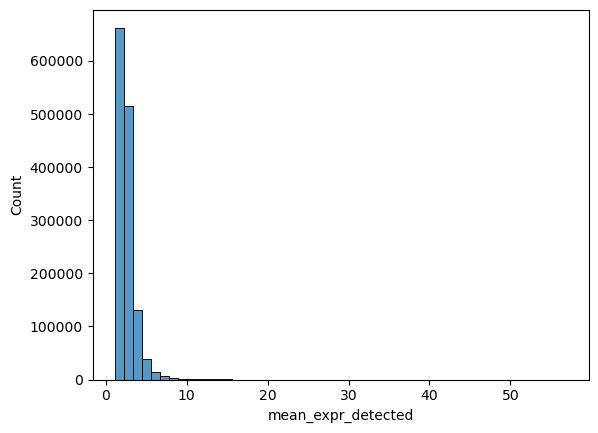

In [27]:
sns.histplot(adata.obs['mean_expr_detected'], bins=50)

In [22]:

adata = sc.read_h5ad("/home/hkaufm49/working_repo/TMS/pansci/data/pansci_3m_wt.h5ad")
adata.obs['cluster_number'] = adata.obs['Sub_cell_type'].str.extract(r'-(\d+)-').astype(int)
adata.obs['sex'] = adata.obs['Sex'].str.lower()
adata.obs['tissue'] = adata.obs['Sub_cell_type'].str.split('-').str[-1].str.lower()
adata.obs['age'] = adata.obs['Age_group'].str.split('_').str[0].astype(int)
adata.obs['cluster_id'] =  adata.obs['tissue'].astype(str) + "_" +  adata.obs['age'].astype(str) + "m_" + adata.obs['sex'].astype(str) + "_" + adata.obs['cluster_number'].astype(str)
adata.obs['mouse_id'] =  adata.obs['age'].astype(str) + "_" + adata.obs['ID'].astype(str) + "_" + adata.obs['Sex'].str[0]
adata.obs['cell_type'] = adata.obs['Sub_cell_type'].str.split('-').str[0].str.lower().str.replace(" ", "_")



In [29]:
df = pd.read_csv("/home/hkaufm49/working_repo/TMS/pansci/data/pansci_df_long_merged.csv")

In [31]:
df['cluster_id'].value_counts()

cluster_id
lung_3m_female_2       1066617
lung_3m_female_0        799226
lung_3m_female_1        559044
gwat_3m_male_0          434361
lung_3m_male_1          425113
                        ...   
duodenum_3m_male_15        318
stomach_3m_male_6          316
jejunum_3m_male_1          314
bat_3m_female_11           312
bat_3m_male_13             297
Name: count, Length: 575, dtype: int64

In [49]:
mean_expression_df = (
        df
        .groupby(['cell_type', 'cluster_id'], as_index=False)
        .agg({
            'gene': 'count'}))
print(mean_expression_df.head(20))

                 cell_type           cluster_id  gene
0                basophils     colon_3m_male_15   388
1                basophils      colon_3m_male_5   381
2                basophils   heart_3m_female_17   434
3                basophils      iwat_3m_male_15   347
4                basophils  kidney_3m_female_27   372
5                basophils     liver_3m_male_15   320
6                basophils     lung_3m_female_0  2567
7                basophils    lung_3m_female_10   412
8                basophils     lung_3m_female_2   310
9                basophils     lung_3m_female_3   993
10               basophils     lung_3m_female_4  1386
11               basophils     lung_3m_female_7   827
12               basophils     lung_3m_female_8   311
13               basophils       lung_3m_male_2   323
14               basophils       lung_3m_male_7   332
15  cfd+_scd1+_macrophages      bat_3m_female_0  2548
16  cfd+_scd1+_macrophages      bat_3m_female_1  3645
17  cfd+_scd1+_macrophages  

In [46]:
df.sort_values(by='cluster_id', inplace=True)
print(df.head(20))

          Unnamed: 0                                            cell_id  \
13840603    13840603  20230627_EXP111_032_GGCGGTAAGC_Plate_4_ACCAGAC...   
14967774    14967774  20230501_EXP111_015_TCTTGCAGAA_Plate_4_ACCAGAC...   
13345424    13345424  20230501_EXP111_046_TTGGTTCTCA_Plate_4_AGAGTAC...   
9546214      9546214  20230627_EXP111_035_AGAACCGCTT_Plate_4_AGTAATC...   
8671684      8671684  20230627_EXP111_010_TTCAGGAGGT_Plate_4_AGAGAAT...   
13409007    13409007  20230501_EXP111_030_GTACCATGGC_Plate_4_ACCAGAC...   
18914462    18914462  20230627_EXP111_010_TTCAGGAGGT_Plate_4_AGAGAAT...   
13784193    13784193  20230627_EXP111_010_TTCAGGAGGT_Plate_4_AGAGAAT...   
5065364      5065364  20230501_EXP111_052_AATTGGAATA_Plate_4_TTCGCCA...   
16779602    16779602  20230627_EXP111_010_TTCAGGAGGT_Plate_4_AGAGAAT...   
6607457      6607457  20230501_EXP111_030_GTACCATGGC_Plate_4_ACCAGAC...   
7918415      7918415  20230501_EXP111_059_TCGCATCAGT_Plate_4_CGCTAAT...   
6942132      6942132  202